In [1]:
import matplotlib.pyplot as plt 
from astropy import units as u
from astropy.io import fits
import numpy as np 
from reproject import reproject_interp
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization import simple_norm

In [2]:
directory = "/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/USNOA2-1125-19940303/"
cube='arp86-3_cube.fits'

In [4]:
# import data of BBarolo model 
# get the header 
header = fits.getheader(directory+cube)
data = fits.getdata(directory+cube)
#data moment0
data_mom0 = fits.getdata(directory+"output10/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_0mom.fits")
header_mom0 = fits.getheader(directory+"output10/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_0mom.fits")
#data moment1
data_mom1 = fits.getdata(directory+"output10/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_1mom.fits")
#data moment2
data_mom2 = fits.getdata(directory+"output10/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_2mom.fits")
#data model
data_model = fits.getdata(directory+"output10/SoFiA_J234703.61+292835.6/SoFiA_J234703.61+292835.6mod_none.fits")
#moment 0 of the model
data_model_mom0 = fits.getdata(directory+"output10/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6mod_0mom_none.fits")
#moment 1 of the model
data_model_mom1 = fits.getdata(directory+"output10/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6mod_1mom_none.fits")
#moment 2 of the model 
data_model_mom2 = fits.getdata(directory+"output10/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6mod_2mom_none.fits")

In [5]:
# upload the optical image 
optical_file = "arp86-3-optical.fits"
header_optical  = fits.getheader(directory+optical_file)
data_optical = fits.getdata(directory+optical_file)

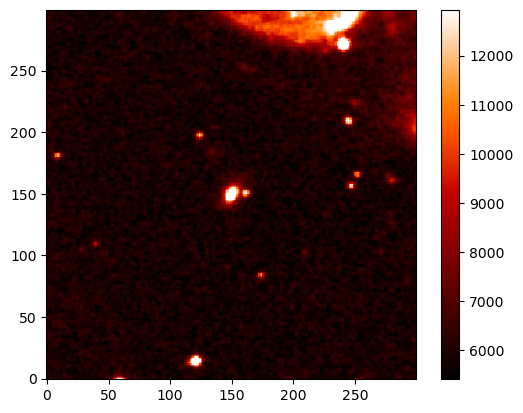

In [7]:
vmin, vmax = np.percentile(data_optical, [1, 99.5])
plt.imshow(data_optical, cmap='gist_heat', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar()
plt.show()

### Reproject the HI image into the same pixel grid as the optical image

In [9]:
hdul_mom0 = fits.open(directory+"output10/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_0mom.fits")
hi_reprojected_0,footprint = reproject_interp(hdul_mom0,header_optical)
rms_mom0 = np.sqrt(np.nanmean(hi_reprojected_0**2))

In [10]:
print(rms_mom0)
print(np.nanmax(hi_reprojected_0))

0.19351652277382284
0.5791908502578735


In [13]:
np.linspace(2 * rms_mom0, np.nanmax(hi_reprojected_0), 8)

array([0.38703305, 0.41448416, 0.44193528, 0.46938639, 0.49683751,
       0.52428862, 0.55173974, 0.57919085])

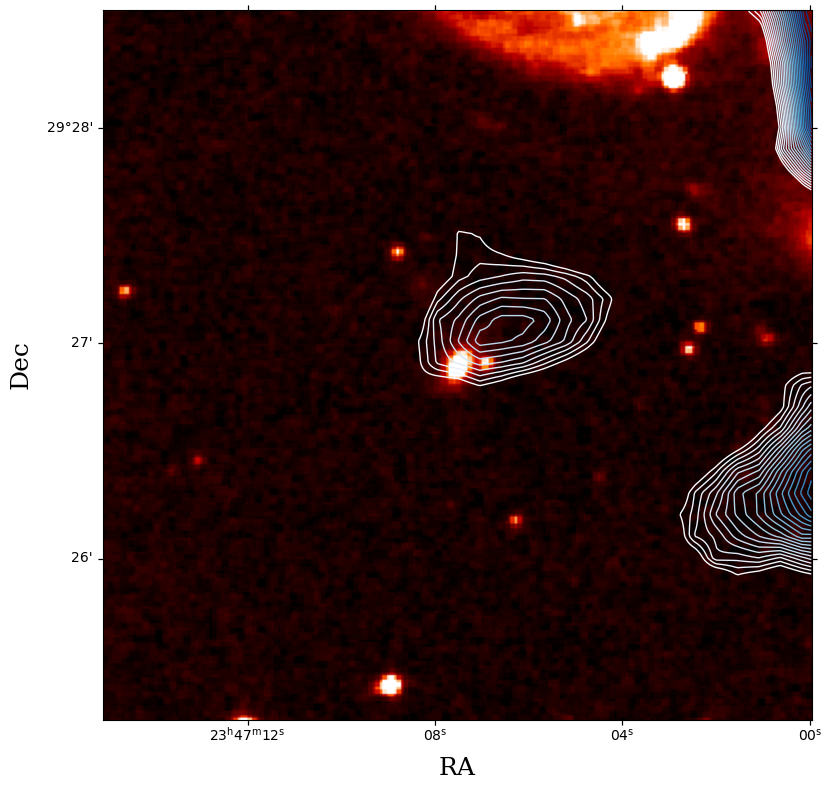

In [16]:
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(1, 1, 1, projection=WCS(header_optical))

# Background: Optical image
cb = ax.imshow(
    data_optical,
    cmap='gist_heat',  
    origin='lower',
    vmin=vmin, vmax=vmax,
)

# Contour levels from 2σ to max
levels = np.linspace(1.5 * rms_mom0, np.nanmax(hi_reprojected_0), 25)

# Contour overlay in white or cyan for visibility
ax.contour(
    hi_reprojected_0,
    levels=levels,
    cmap='Blues', 
    linewidths=1,
)

ax.set_xlabel('RA', size=18, family='serif')
ax.set_ylabel('Dec', size=18, family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.tight_layout()
plt.show()

In [17]:
# compute the reprojection for moment 1 
hdulmom1 = fits.open(directory+"output10/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_1mom.fits")
hi_mom1_rep, foot_mom1=reproject_interp(hdulmom1,header_optical)
rms_mom1=(np.sqrt(np.nanmean(hi_mom1_rep**2)))

In [18]:
print(np.nanmin(hi_mom1_rep),np.nanmax(hi_mom1_rep))
print(rms_mom1)

4429.9345703125 5321.748046875
5037.015659642403


In [19]:
np.arange(np.nanmin(hi_mom1_rep),np.nanmax(hi_mom1_rep),20)

array([4429.93457031, 4449.93457031, 4469.93457031, 4489.93457031,
       4509.93457031, 4529.93457031, 4549.93457031, 4569.93457031,
       4589.93457031, 4609.93457031, 4629.93457031, 4649.93457031,
       4669.93457031, 4689.93457031, 4709.93457031, 4729.93457031,
       4749.93457031, 4769.93457031, 4789.93457031, 4809.93457031,
       4829.93457031, 4849.93457031, 4869.93457031, 4889.93457031,
       4909.93457031, 4929.93457031, 4949.93457031, 4969.93457031,
       4989.93457031, 5009.93457031, 5029.93457031, 5049.93457031,
       5069.93457031, 5089.93457031, 5109.93457031, 5129.93457031,
       5149.93457031, 5169.93457031, 5189.93457031, 5209.93457031,
       5229.93457031, 5249.93457031, 5269.93457031, 5289.93457031,
       5309.93457031])

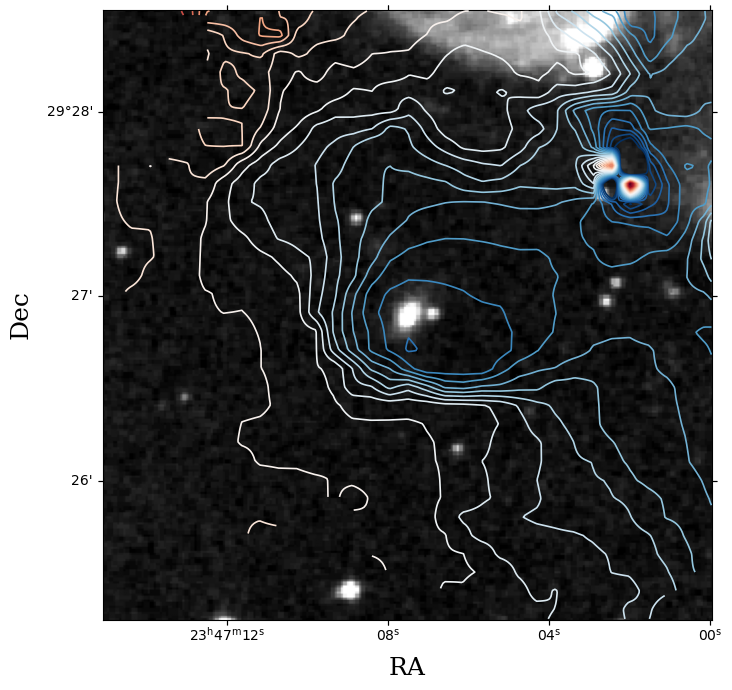

In [30]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1, projection=WCS(header_optical))

# Use log stretch for better contrast in faint structures
norm = simple_norm(data_optical, 'log', percent=99.5)
ax.imshow(data_optical, cmap='gist_gray', vmin=vmin,vmax=vmax, origin='lower')

# Velocity field (moment 1) contours: reversed RdBu, centered around systemic velocity
# Adjust levels if needed based on your specific velocity range
vel_min, vel_max = np.nanmin(hi_mom1_rep), np.nanmax(hi_mom1_rep)  # You can automate this with np.nanmin/max if desired
levels = np.arange(vel_min+430, vel_max, 20)
cont = ax.contour(hi_mom1_rep, levels=levels, cmap='RdBu_r', linewidths=1.2)

# Add a colorbar for the moment 1 contours (velocity field)
# label the contour, this is optional
#ax.clabel(cont, inline=True, fmt='%d km/s', fontsize=10)

ax.set_xlabel('RA', size=18, family='serif')
ax.set_ylabel('Dec', size=18, family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# save figure 
# plt.savefig('velocity_overlay.svg', dpi=300)

plt.tight_layout()
plt.show()

In [31]:
hdulmom2 = fits.open(directory+"output10/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_2mom.fits")
hi_mom2_rep, foot_mom2=reproject_interp(hdulmom2,header_optical)
rms_mom2=(np.sqrt(np.nanmean(hi_mom2_rep**2)))

In [32]:
print(rms_mom2)
print(np.nanmin(hi_mom2_rep),np.nanmax(hi_mom2_rep))

43.957166165765315
0.00018860459385905415 155.77597045898438


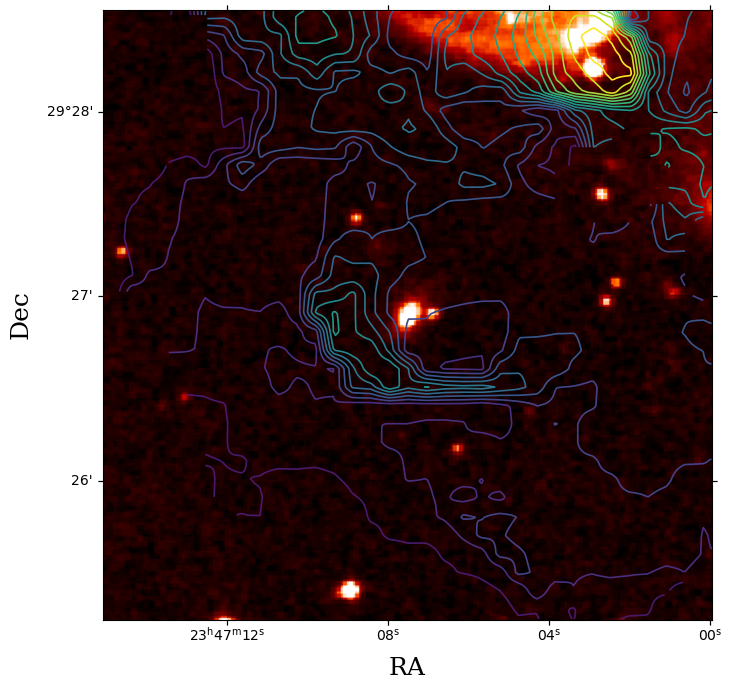

In [33]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1, projection=WCS(header_optical))

# Improve optical background contrast
norm = simple_norm(data_optical, 'log', percent=99.5)
ax.imshow(data_optical, cmap='gist_heat', vmin=vmin,vmax=vmax, origin='lower')

# Contours for moment 2 (velocity dispersion)
disp_min, disp_max = np.nanmin(hi_mom2_rep),np.nanmax(hi_mom2_rep)  # in km/s (check your units)
levels = np.arange(disp_min, disp_max, 10)
cont = ax.contour(hi_mom2_rep, levels=levels, cmap='viridis', linewidths=1.2)

# Label the contours
#ax.clabel(cont, inline=True, fmt='%d km/s', fontsize=10)

# Axis formatting
ax.set_xlabel('RA', size=18, family='serif')
ax.set_ylabel('Dec', size=18, family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# plt.savefig('moment2_overlay.svg', dpi=300)

plt.tight_layout()
plt.show()

## Residuals

In [34]:
residual_mom0 = data_mom0 -data_model_mom0
residual_mom1 = data_mom1 -data_model_mom1
residual_mom2 = data_mom2 -data_model_mom2

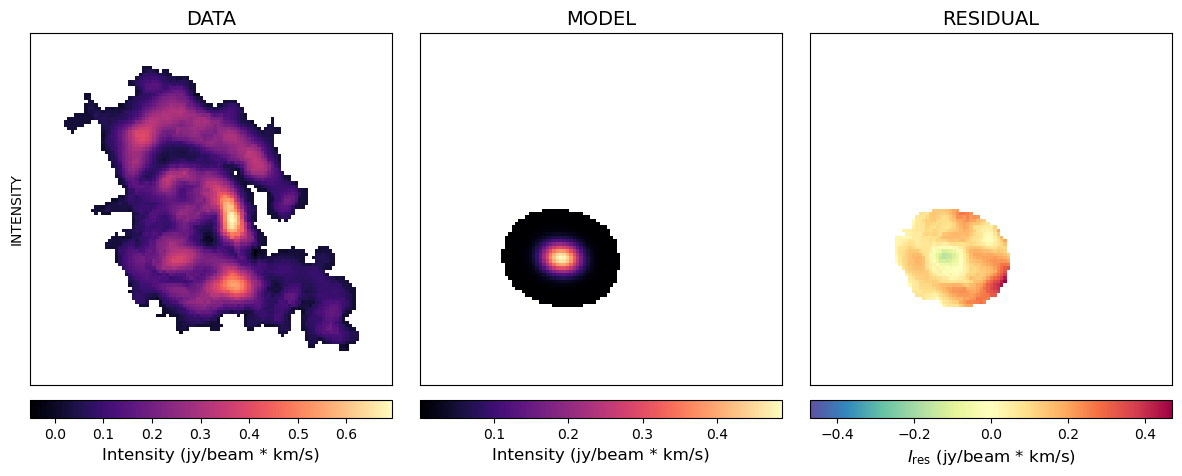

In [35]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'wspace': 0.02})  # tighter spacing

# Common image kwargs
common_kwargs = dict(origin='lower', interpolation='none')

# ---------- Panel 1: DATA ----------
im1 = axs[0].imshow(data_mom0, cmap='magma', **common_kwargs)
axs[0].set_title('DATA', fontsize=14)
axs[0].set_ylabel('INTENSITY')
axs[0].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

# Add shared colorbar below first two panels
divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("bottom", size="5%", pad=0.15)
cbar1 = plt.colorbar(im1, cax=cax1, orientation='horizontal')
cbar1.set_label('Intensity (jy/beam * km/s)', fontsize=12)

# ---------- Panel 2: MODEL ----------
im2 = axs[1].imshow(data_model_mom0, cmap='magma', **common_kwargs)
axs[1].set_title('MODEL', fontsize=14)
axs[1].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

# Share colorbar with first panel
divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("bottom", size="5%", pad=0.15)
cbar2 = plt.colorbar(im2, cax=cax2, orientation='horizontal')
cbar2.set_label('Intensity (jy/beam * km/s)', fontsize=12)

# ---------- Panel 3: RESIDUAL ----------
resid_abs_max = np.nanmax(np.abs(residual_mom0))
im3 = axs[2].imshow(residual_mom0, cmap='Spectral_r', vmin=-resid_abs_max, vmax=resid_abs_max, **common_kwargs)
axs[2].set_title('RESIDUAL', fontsize=14)
axs[2].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

# Separate colorbar for residuals
divider3 = make_axes_locatable(axs[2])
cax3 = divider3.append_axes("bottom", size="5%", pad=0.15)
cbar3 = plt.colorbar(im3, cax=cax3, orientation='horizontal')   
cbar3.set_label(r'$I_{\mathrm{res}}$ (jy/beam * km/s)', fontsize=12)

# Equal aspect ratio for all panels
for ax in axs:
    ax.set_aspect('equal')

# Optional export
plt.savefig("moment0_panels_fixed.jpg", dpi=300, bbox_inches='tight')
# plt.savefig("moment0_model.eps",format="eps", dpi=300, bbox_inches='tight')
plt.show()


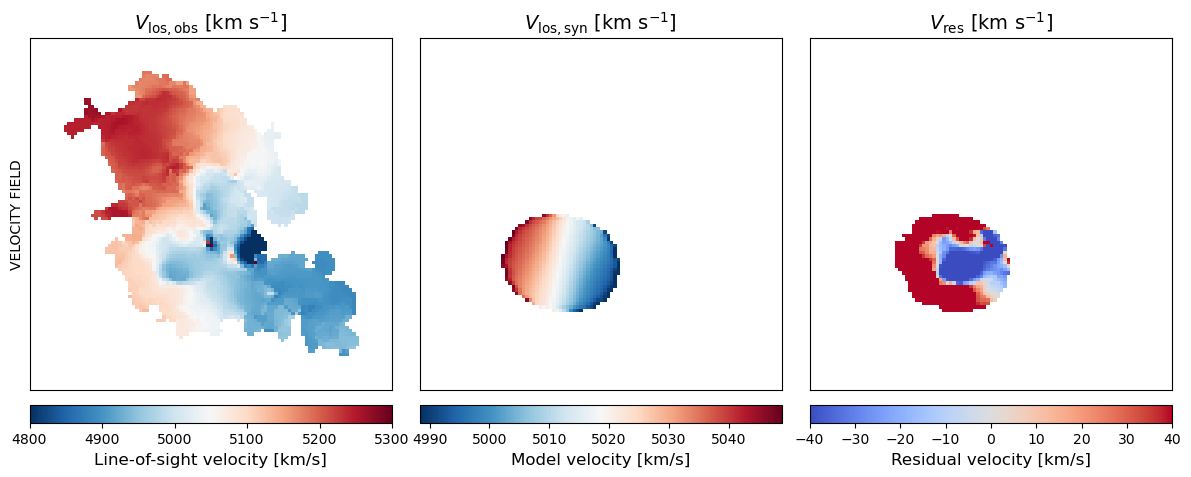

In [36]:
# Create figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'wspace': 0.02})

# Shared image display settings
common_kwargs = dict(origin='lower', interpolation='none')

# ---------- Panel 1: Observed velocity ----------
im1 = axs[0].imshow(data_mom1, cmap='RdBu_r', vmin=4800, vmax=5300, **common_kwargs)
axs[0].set_title(r'$V_{\mathrm{los,obs}}$ [km s$^{-1}$]', fontsize=14)
axs[0].set_ylabel('VELOCITY FIELD')
axs[0].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("bottom", size="5%", pad=0.15)
cbar1 = plt.colorbar(im1, cax=cax1, orientation='horizontal')
cbar1.set_label('Line-of-sight velocity [km/s]', fontsize=12)

# ---------- Panel 2: Model velocity ----------
im2 = axs[1].imshow(data_model_mom1, cmap='RdBu_r', **common_kwargs)
axs[1].set_title(r'$V_{\mathrm{los,syn}}$ [km s$^{-1}$]', fontsize=14)
axs[1].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("bottom", size="5%", pad=0.15)
cbar2 = plt.colorbar(im2, cax=cax2, orientation='horizontal')
cbar2.set_label('Model velocity [km/s]', fontsize=12)

# ---------- Panel 3: Residual velocity ----------
resid_vlim = 40  # km/s
im3 = axs[2].imshow(residual_mom1, cmap='coolwarm', vmin=-resid_vlim, vmax=resid_vlim, **common_kwargs)
axs[2].set_title(r'$V_{\mathrm{res}}$ [km s$^{-1}$]', fontsize=14)
axs[2].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

divider3 = make_axes_locatable(axs[2])
cax3 = divider3.append_axes("bottom", size="5%", pad=0.15)
cbar3 = plt.colorbar(im3, cax=cax3, orientation='horizontal')
cbar3.set_label(r'Residual velocity [km/s]', fontsize=12)

# Format all panels
for ax in axs:
    ax.set_aspect('equal')

# Optional: Export as publication-quality PDF
# plt.savefig("moment1_threepanel_velocity.pdf", dpi=300, bbox_inches='tight')
plt.show()

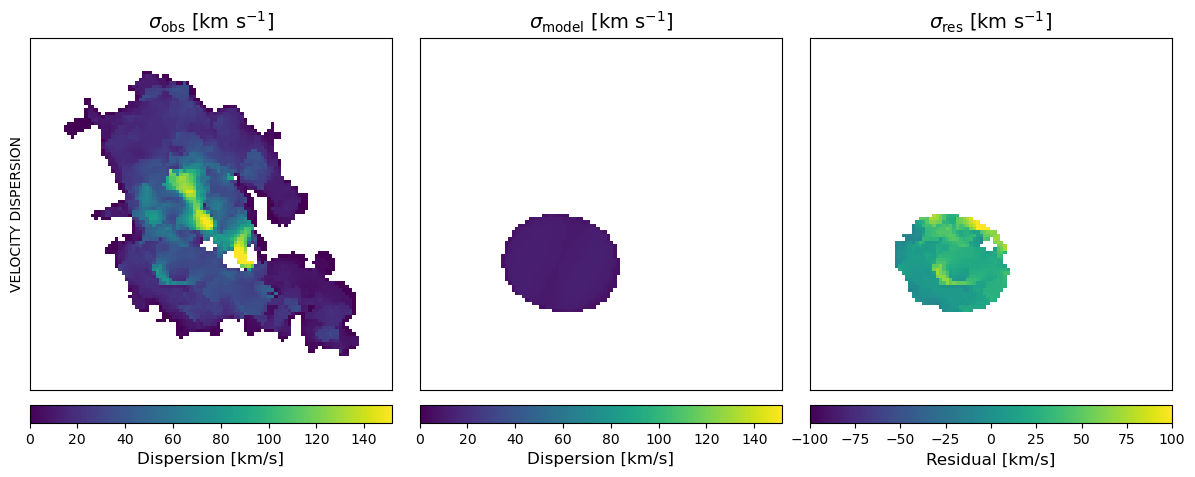

In [37]:
# Create figure and axes with tight spacing
fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'wspace': 0.02})

# Shared display settings
common_kwargs = dict(origin='lower', interpolation='none')

# ---------- Panel 1: Observed dispersion ----------
vmin_m2 = 0
vmax_m2 = np.nanpercentile(data_mom2, 99.5)
im1 = axs[0].imshow(data_mom2, cmap='viridis', vmin=vmin_m2, vmax=vmax_m2, **common_kwargs)
axs[0].set_title(r'$\sigma_{\mathrm{obs}}$ [km s$^{-1}$]', fontsize=14)
axs[0].set_ylabel('VELOCITY DISPERSION')
axs[0].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("bottom", size="5%", pad=0.15)
cbar1 = plt.colorbar(im1, cax=cax1, orientation='horizontal')
cbar1.set_label('Dispersion [km/s]', fontsize=12)

# ---------- Panel 2: Model dispersion ----------
im2 = axs[1].imshow(data_model_mom2, cmap='viridis', vmin=vmin_m2, vmax=vmax_m2, **common_kwargs)
axs[1].set_title(r'$\sigma_{\mathrm{model}}$ [km s$^{-1}$]', fontsize=14)
axs[1].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("bottom", size="5%", pad=0.15)
cbar2 = plt.colorbar(im2, cax=cax2, orientation='horizontal')
cbar2.set_label('Dispersion [km/s]', fontsize=12)

# ---------- Panel 3: Residual dispersion ----------
resid_lim = 100  # km/s
im3 = axs[2].imshow(residual_mom2, cmap='viridis', vmin=-resid_lim, vmax=resid_lim, **common_kwargs)
axs[2].set_title(r'$\sigma_{\mathrm{res}}$ [km s$^{-1}$]', fontsize=14)
axs[2].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

divider3 = make_axes_locatable(axs[2])
cax3 = divider3.append_axes("bottom", size="5%", pad=0.15)
cbar3 = plt.colorbar(im3, cax=cax3, orientation='horizontal')
cbar3.set_label('Residual [km/s]', fontsize=12)

# Consistent appearance
for ax in axs:
    ax.set_aspect('equal')

# Optional: Export figure
# plt.savefig("moment2_threepanel_dispersion.pdf", dpi=300, bbox_inches='tight')
plt.show()


# Residual of the gas

In [38]:
data_new_galaxy = data - data_model


In [46]:
# create a trehsold to mask the noise
rms_data=np.sqrt(np.nanmean(data_new_galaxy**2))
data_new_galaxy_masked = np.where(data_new_galaxy > 2*rms_data, data_new_galaxy, np.nan)
mom0_dat_new = np.nansum(data_new_galaxy_masked,axis=0)*abs(header['CDELT3'])/1000


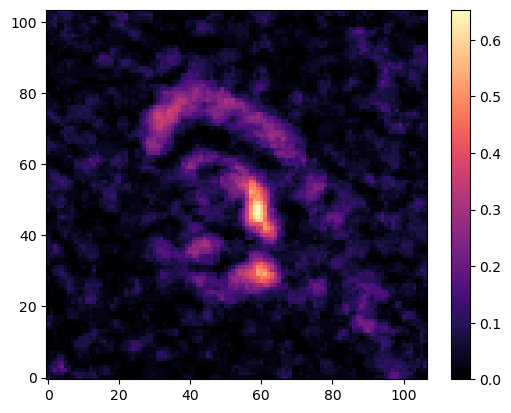

In [48]:
plt.imshow(mom0_dat_new, cmap='magma', origin='lower')
plt.colorbar()
plt.show()